# The Sparks Foundation-Data science & Business Analytics

## Name:G.Meghana Reddy

## Task 1: Prediction using Supervised ML

 - Predict the percentage of an student based on the number of study hours.
 - What will be predicted score if a student studies for 9.25 hrs/ day?

## Algorithm:

- Step 1: Read the dataset
- Step 2: Virtualize the Dataset
- Step 3: Training the Model - Using Linear Regression
- Step 4: Testing the Model - Predicting the Score Percentage
- Step 5: Comparing Predicted Scores with the Actual Score
- Step 6: Evaluate the Model Using Metrics
- Step 7: Predicted score if a student studies for 9.25 hrs/day

### 1. Read the dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [3]:
#Reading data from given link
student_data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Data imported Successfully

In [10]:
#to get the number if rows & columns.
student_data.shape

(25, 2)

In [7]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#To check the null value
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 2. Virtualize the Dataset

In [14]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

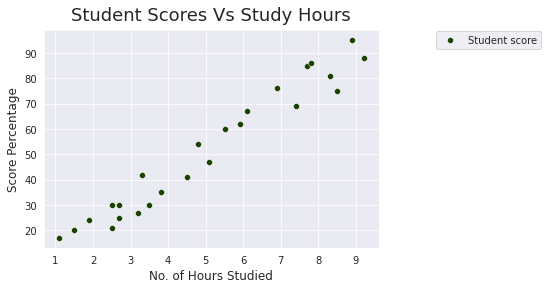

In [15]:
sns.set_style('darkgrid')
sns.scatterplot(x= student_data['Hours'], y= student_data['Scores'], color='#1a4301', label='Student score')
plt.title('Student Scores Vs Study Hours', pad='10.0', size=18)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('No. of Hours Studied', size=12)
plt.legend(bbox_to_anchor =(1.50, 1.02), ncol = 2)
plt.show()

#### From this graph, we can observe that there is a some degree of positive correlation between the 2 variables.

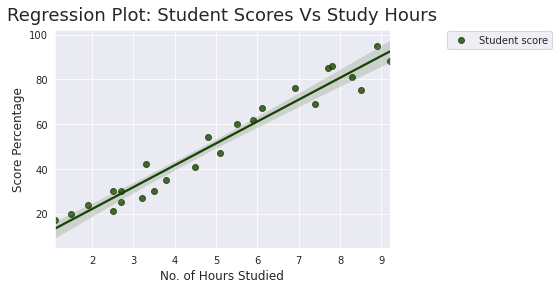

In [16]:
sns.regplot(x= student_data['Hours'], y= student_data['Scores'], color='#1a4301', label='Student score') # To draw regression plot
plt.title('Regression Plot: Student Scores Vs Study Hours', pad='10.0', size=18)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('No. of Hours Studied', size=12)
plt.legend(bbox_to_anchor =(1.50, 1.02), ncol = 2)
plt.show()

#### From this graph, we can observe that the positive correlation exists between the 2 variables.

In [17]:
# To find the value of correlation
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### The 2 variables, Hours and Scores, are in high positive correlation as the correlation value is 0.976191.

### 3. Training the Model - Using Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
# Defining X and y from the Data
X = student_data.iloc[:, :-1].values  # All rows, except last column
y = student_data.iloc[:, 1].values # All rows, with last column

# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=0)

Fitting the Data into the Linear Regression Model

In [20]:
linreg = LinearRegression()
linreg.fit(train_X, train_y)
print("Model Trained")

Model Trained


### 4. Testing the Model - Predicting the Score Percentage

In [21]:
predicted_y = linreg.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Score': [k for k in predicted_y]})
prediction

,Hours,Predicted Score
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


### 5. Comparing Predicted Scores with the Actual Score

In [22]:
compare = pd.DataFrame({'Actual Score': test_y, 'Predicted Score': predicted_y})
compare

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Visual Comparisons

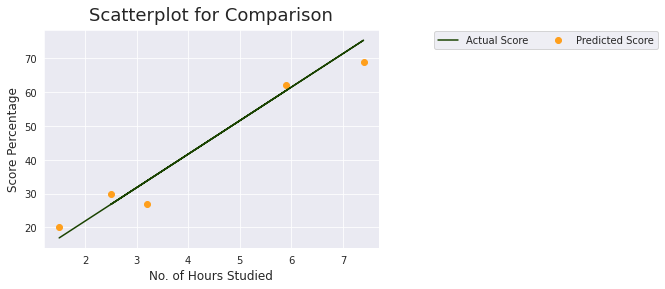

In [23]:
plt.scatter(x=test_X, y=test_y, color='#ff9f1c', label='Predicted Score') # Scatterplot
plt.plot(test_X, predicted_y, color='#1a4301', label='Actual Score') # Line of Best Fit
plt.title('Scatterplot for Comparison', pad='10.0', size=18)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('No. of Hours Studied', size=12)
plt.legend(bbox_to_anchor =(1.15, 1.02), ncol = 2)
plt.show()

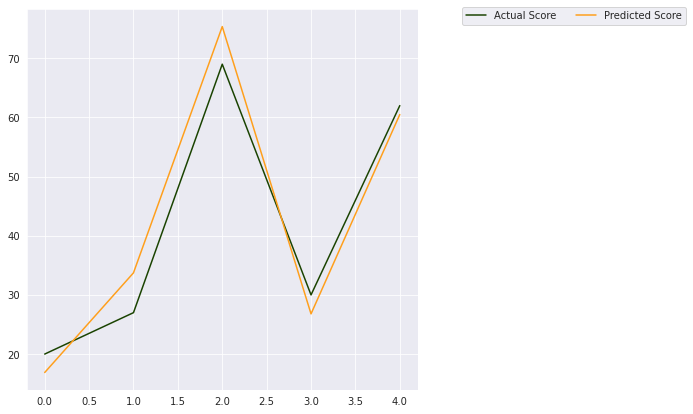

In [24]:
compare.plot(kind='line',figsize=(7,7), color=['#1a4301','#ff9f1c'])
plt.legend(bbox_to_anchor =(1.70, 1.02), ncol = 2)
plt.show()

### 6. Evaluate the Model Using Metrics

In [25]:
#MAE
print("Mean Absolute Error: ",metrics.mean_absolute_error(test_y, predicted_y))

Mean Absolute Error:  4.183859899002982


In [26]:
print("R2 score =", round(metrics.r2_score(test_y, predicted_y), 2))

R2 score = 0.95


The MAE value of this model is 4.18, which is fairly less and this implies that the chances of getting an error is low, and the R2 score is 0.95 which is really good.

### 7. Predicted score if a student studies for 9.25 hrs/day

In [27]:
hours_studied = [9.25]
predicted_score = linreg.predict([hours_studied])
print("Predicted Score= {}".format(round(predicted_score[0],2)))

Predicted Score= 93.69


Therefore, the predicted score, if a student studies for 9.25 hours/day is 93.69.